In [1]:
!which python3.5
import sys
sys.version

/usr/bin/python3.5


'3.5.2 (default, Nov 23 2017, 16:37:01) \n[GCC 5.4.0 20160609]'

# Underfit Example

An underfit model is one that is demonstrated to perform well on the training dataset and poor on 
the test dataset. This can be diagnosed from a plot where the training loss is lower than the 
validation loss, and the validation loss has a trend that suggests further improvements are possible.
A small contrived example of an underfit LSTM model is provided below.

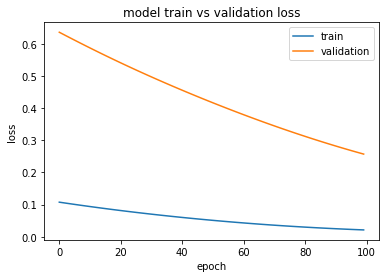

In [11]:
from PIL import Image
im = Image.open("underfit.png")
im

Train on 5 samples, validate on 5 samples
Epoch 1/100
5/5 [==============================] - 1s 228ms/step - loss: 0.1076 - val_loss: 0.6363
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1062 - val_loss: 0.6313
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1048 - val_loss: 0.6264
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1034 - val_loss: 0.6214
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1020 - val_loss: 0.6165
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1006 - val_loss: 0.6116
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0993 - val_loss: 0.6067
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0979 - val_loss: 0.6018
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0966 - val_loss: 0.5970
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0953 - va

Epoch 85/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0278 - val_loss: 0.2998
Epoch 86/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0273 - val_loss: 0.2968
Epoch 87/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0268 - val_loss: 0.2938
Epoch 88/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0263 - val_loss: 0.2909
Epoch 89/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0259 - val_loss: 0.2879
Epoch 90/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0254 - val_loss: 0.2850
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0249 - val_loss: 0.2821
Epoch 92/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0245 - val_loss: 0.2792
Epoch 93/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0241 - val_loss: 0.2764
Epoch 94/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0236 - val_loss: 0.2736
Epoch 95/100
5/5 [==

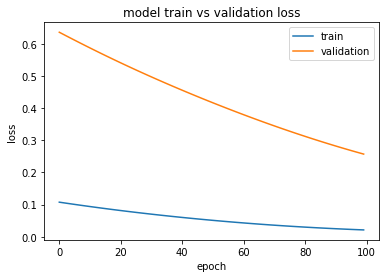

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
from numpy import array
%matplotlib inline 
# return training data
def get_train():
	seq = [[0.0, 0.1], [0.1, 0.2], [0.2, 0.3], [0.3, 0.4], [0.4, 0.5]]
	seq = array(seq)
	X, y = seq[:, 0], seq[:, 1]
	X = X.reshape((len(X), 1, 1))
	return X, y
 
# return validation data
def get_val():
	seq = [[0.5, 0.6], [0.6, 0.7], [0.7, 0.8], [0.8, 0.9], [0.9, 1.0]]
	seq = array(seq)
	X, y = seq[:, 0], seq[:, 1]
	X = X.reshape((len(X), 1, 1))
	return X, y
 
# define model
model = Sequential()
model.add(LSTM(10, input_shape=(1,1)))
model.add(Dense(1, activation='linear'))
# compile model
model.compile(loss='mse', optimizer='adam')
# fit model
X,y = get_train()
valX, valY = get_val()
history = model.fit(X, y, epochs=100, validation_data=(valX, valY), shuffle=False)
# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

# Alternately 
A model may be underfit if performance on the training set is better than the validation 
set and performance has leveled off. Below is an example of an an underfit model with insufficient 
memory cells.

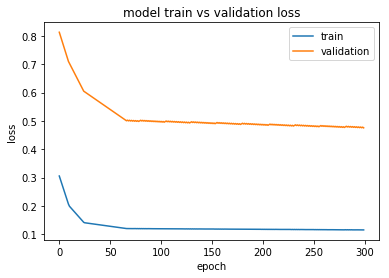

In [12]:
from PIL import Image
im0 = Image.open("alternativly.png")
im0

Train on 5 samples, validate on 5 samples
Epoch 1/300
5/5 [==============================] - 1s 165ms/step - loss: 0.3056 - val_loss: 0.8130
Epoch 2/300
5/5 [==============================] - 0s 2ms/step - loss: 0.2946 - val_loss: 0.8015
Epoch 3/300
5/5 [==============================] - 0s 2ms/step - loss: 0.2836 - val_loss: 0.7901
Epoch 4/300
5/5 [==============================] - 0s 3ms/step - loss: 0.2726 - val_loss: 0.7787
Epoch 5/300
5/5 [==============================] - 0s 2ms/step - loss: 0.2616 - val_loss: 0.7672
Epoch 6/300
5/5 [==============================] - 0s 2ms/step - loss: 0.2505 - val_loss: 0.7558
Epoch 7/300
5/5 [==============================] - 0s 2ms/step - loss: 0.2395 - val_loss: 0.7443
Epoch 8/300
5/5 [==============================] - 0s 2ms/step - loss: 0.2285 - val_loss: 0.7329
Epoch 9/300
5/5 [==============================] - 0s 1ms/step - loss: 0.2175 - val_loss: 0.7214
Epoch 10/300
5/5 [==============================] - 0s 2ms/step - loss: 0.2065 - va

Epoch 85/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1197 - val_loss: 0.5016
Epoch 86/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1200 - val_loss: 0.4991
Epoch 87/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1197 - val_loss: 0.5012
Epoch 88/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1199 - val_loss: 0.4987
Epoch 89/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1197 - val_loss: 0.5008
Epoch 90/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1198 - val_loss: 0.4983
Epoch 91/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1197 - val_loss: 0.5004
Epoch 92/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1198 - val_loss: 0.4979
Epoch 93/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1197 - val_loss: 0.5000
Epoch 94/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1197 - val_loss: 0.4975
Epoch 95/300
5/5 [==

Epoch 168/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1182 - val_loss: 0.4921
Epoch 169/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1182 - val_loss: 0.4896
Epoch 170/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1182 - val_loss: 0.4917
Epoch 171/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1181 - val_loss: 0.4892
Epoch 172/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1181 - val_loss: 0.4913
Epoch 173/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1180 - val_loss: 0.4888
Epoch 174/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1181 - val_loss: 0.4909
Epoch 175/300
5/5 [==============================] - 0s 3ms/step - loss: 0.1179 - val_loss: 0.4884
Epoch 176/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1181 - val_loss: 0.4905
Epoch 177/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1178 - val_loss: 0.4880
Epoch 178/

Epoch 251/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1166 - val_loss: 0.4828
Epoch 252/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1164 - val_loss: 0.4803
Epoch 253/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1166 - val_loss: 0.4824
Epoch 254/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1163 - val_loss: 0.4799
Epoch 255/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1166 - val_loss: 0.4820
Epoch 256/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1162 - val_loss: 0.4795
Epoch 257/300
5/5 [==============================] - 0s 3ms/step - loss: 0.1166 - val_loss: 0.4816
Epoch 258/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1162 - val_loss: 0.4837
Epoch 259/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1165 - val_loss: 0.4812
Epoch 260/300
5/5 [==============================] - 0s 3ms/step - loss: 0.1162 - val_loss: 0.4833
Epoch 261/

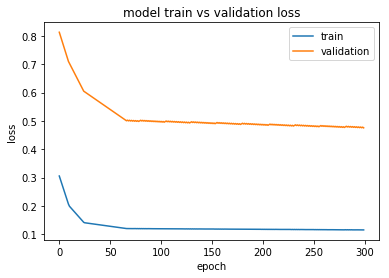

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
from numpy import array
%matplotlib inline 

# return training data
def get_train():
	seq = [[0.0, 0.1], [0.1, 0.2], [0.2, 0.3], [0.3, 0.4], [0.4, 0.5]]
	seq = array(seq)
	X, y = seq[:, 0], seq[:, 1]
	X = X.reshape((5, 1, 1))
	return X, y

# return validation data
def get_val():
	seq = [[0.5, 0.6], [0.6, 0.7], [0.7, 0.8], [0.8, 0.9], [0.9, 1.0]]
	seq = array(seq)
	X, y = seq[:, 0], seq[:, 1]
	X = X.reshape((len(X), 1, 1))
	return X, y

# define model
model = Sequential()
model.add(LSTM(1, input_shape=(1,1)))
model.add(Dense(1, activation='linear'))
# compile model
model.compile(loss='mae', optimizer='sgd')
# fit model
X,y = get_train()
valX, valY = get_val()
history = model.fit(X, y, epochs=300, validation_data=(valX, valY), shuffle=False)
# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

# Good Fit Example

A good fit is a case where the performance of the model is good on both the train and validation sets.
This can be diagnosed from a plot where the train and validation loss decrease and stabilize around 
the same point. The small example below demonstrates an LSTM model with a good fit.

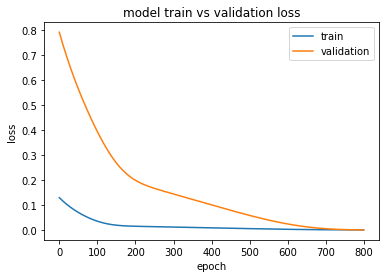

In [13]:
from PIL import Image
im1 = Image.open("goodfit.png")
im1

Train on 5 samples, validate on 5 samples
Epoch 1/800
5/5 [==============================] - 1s 237ms/step - loss: 0.1290 - val_loss: 0.7900
Epoch 2/800
5/5 [==============================] - 0s 2ms/step - loss: 0.1275 - val_loss: 0.7847
Epoch 3/800
5/5 [==============================] - 0s 5ms/step - loss: 0.1261 - val_loss: 0.7794
Epoch 4/800
5/5 [==============================] - 0s 5ms/step - loss: 0.1246 - val_loss: 0.7741
Epoch 5/800
5/5 [==============================] - 0s 8ms/step - loss: 0.1231 - val_loss: 0.7689
Epoch 6/800
5/5 [==============================] - 0s 1ms/step - loss: 0.1217 - val_loss: 0.7637
Epoch 7/800
5/5 [==============================] - 0s 2ms/step - loss: 0.1203 - val_loss: 0.7585
Epoch 8/800
5/5 [==============================] - 0s 2ms/step - loss: 0.1189 - val_loss: 0.7534
Epoch 9/800
5/5 [==============================] - 0s 3ms/step - loss: 0.1175 - val_loss: 0.7483
Epoch 10/800
5/5 [==============================] - 0s 2ms/step - loss: 0.1161 - va

Epoch 85/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0439 - val_loss: 0.4430
Epoch 86/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0433 - val_loss: 0.4397
Epoch 87/800
5/5 [==============================] - 0s 3ms/step - loss: 0.0427 - val_loss: 0.4364
Epoch 88/800
5/5 [==============================] - 0s 3ms/step - loss: 0.0421 - val_loss: 0.4332
Epoch 89/800
5/5 [==============================] - 0s 3ms/step - loss: 0.0415 - val_loss: 0.4300
Epoch 90/800
5/5 [==============================] - 0s 3ms/step - loss: 0.0409 - val_loss: 0.4268
Epoch 91/800
5/5 [==============================] - 0s 3ms/step - loss: 0.0403 - val_loss: 0.4236
Epoch 92/800
5/5 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.4204
Epoch 93/800
5/5 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.4173
Epoch 94/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0386 - val_loss: 0.4142
Epoch 95/800
5/5 [==

Epoch 168/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0167 - val_loss: 0.2378
Epoch 169/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0166 - val_loss: 0.2363
Epoch 170/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0165 - val_loss: 0.2348
Epoch 171/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0165 - val_loss: 0.2333
Epoch 172/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0164 - val_loss: 0.2319
Epoch 173/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0163 - val_loss: 0.2304
Epoch 174/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0162 - val_loss: 0.2290
Epoch 175/800
5/5 [==============================] - 0s 3ms/step - loss: 0.0161 - val_loss: 0.2276
Epoch 176/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0160 - val_loss: 0.2262
Epoch 177/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0160 - val_loss: 0.2249
Epoch 178/

Epoch 251/800
5/5 [==============================] - 0s 3ms/step - loss: 0.0131 - val_loss: 0.1660
Epoch 252/800
5/5 [==============================] - 0s 3ms/step - loss: 0.0130 - val_loss: 0.1655
Epoch 253/800
5/5 [==============================] - 0s 3ms/step - loss: 0.0130 - val_loss: 0.1650
Epoch 254/800
5/5 [==============================] - 0s 3ms/step - loss: 0.0130 - val_loss: 0.1646
Epoch 255/800
5/5 [==============================] - 0s 4ms/step - loss: 0.0129 - val_loss: 0.1641
Epoch 256/800
5/5 [==============================] - 0s 3ms/step - loss: 0.0129 - val_loss: 0.1636
Epoch 257/800
5/5 [==============================] - 0s 3ms/step - loss: 0.0129 - val_loss: 0.1631
Epoch 258/800
5/5 [==============================] - 0s 5ms/step - loss: 0.0128 - val_loss: 0.1627
Epoch 259/800
5/5 [==============================] - 0s 3ms/step - loss: 0.0128 - val_loss: 0.1622
Epoch 260/800
5/5 [==============================] - 0s 3ms/step - loss: 0.0128 - val_loss: 0.1617
Epoch 261/

Epoch 334/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.1291
Epoch 335/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.1287
Epoch 336/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.1283
Epoch 337/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.1278
Epoch 338/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0104 - val_loss: 0.1274
Epoch 339/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.1269
Epoch 340/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0103 - val_loss: 0.1265
Epoch 341/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0103 - val_loss: 0.1261
Epoch 342/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0103 - val_loss: 0.1256
Epoch 343/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0102 - val_loss: 0.1252
Epoch 344/

Epoch 417/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0079 - val_loss: 0.0930
Epoch 418/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0925
Epoch 419/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0921
Epoch 420/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0917
Epoch 421/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0912
Epoch 422/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0908
Epoch 423/800
5/5 [==============================] - 0s 3ms/step - loss: 0.0077 - val_loss: 0.0904
Epoch 424/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0077 - val_loss: 0.0899
Epoch 425/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0076 - val_loss: 0.0895
Epoch 426/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0891
Epoch 427/

Epoch 500/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0583
Epoch 501/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0579
Epoch 502/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0575
Epoch 503/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0571
Epoch 504/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0567
Epoch 505/800
5/5 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0563
Epoch 506/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0559
Epoch 507/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0555
Epoch 508/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0552
Epoch 509/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0050 - val_loss: 0.0548
Epoch 510/

Epoch 583/800
5/5 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0289
Epoch 584/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0286
Epoch 585/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0283
Epoch 586/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0280
Epoch 587/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0277
Epoch 588/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0274
Epoch 589/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0271
Epoch 590/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0268
Epoch 591/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0265
Epoch 592/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0262
Epoch 593/

Epoch 666/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0095
Epoch 667/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0094
Epoch 668/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0092
Epoch 669/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0091
Epoch 670/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0089
Epoch 671/800
5/5 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0087
Epoch 672/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0086
Epoch 673/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0084
Epoch 674/800
5/5 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0083
Epoch 675/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0081
Epoch 676/

Epoch 747/800
5/5 [==============================] - 0s 2ms/step - loss: 4.0953e-04 - val_loss: 0.0015
Epoch 748/800
5/5 [==============================] - 0s 2ms/step - loss: 4.0317e-04 - val_loss: 0.0014
Epoch 749/800
5/5 [==============================] - 0s 3ms/step - loss: 3.9690e-04 - val_loss: 0.0014
Epoch 750/800
5/5 [==============================] - 0s 2ms/step - loss: 3.9071e-04 - val_loss: 0.0013
Epoch 751/800
5/5 [==============================] - 0s 3ms/step - loss: 3.8460e-04 - val_loss: 0.0013
Epoch 752/800
5/5 [==============================] - 0s 2ms/step - loss: 3.7858e-04 - val_loss: 0.0012
Epoch 753/800
5/5 [==============================] - 0s 3ms/step - loss: 3.7264e-04 - val_loss: 0.0012
Epoch 754/800
5/5 [==============================] - 0s 3ms/step - loss: 3.6678e-04 - val_loss: 0.0012
Epoch 755/800
5/5 [==============================] - 0s 2ms/step - loss: 3.6099e-04 - val_loss: 0.0011
Epoch 756/800
5/5 [==============================] - 0s 2ms/step - loss: 

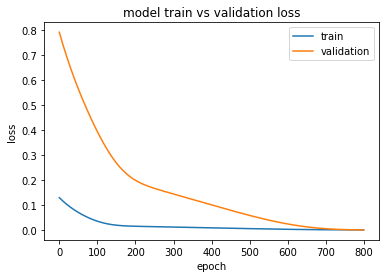

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
from numpy import array

# return training data
def get_train():
	seq = [[0.0, 0.1], [0.1, 0.2], [0.2, 0.3], [0.3, 0.4], [0.4, 0.5]]
	seq = array(seq)
	X, y = seq[:, 0], seq[:, 1]
	X = X.reshape((5, 1, 1))
	return X, y

# return validation data
def get_val():
	seq = [[0.5, 0.6], [0.6, 0.7], [0.7, 0.8], [0.8, 0.9], [0.9, 1.0]]
	seq = array(seq)
	X, y = seq[:, 0], seq[:, 1]
	X = X.reshape((len(X), 1, 1))
	return X, y

# define model
model = Sequential()
model.add(LSTM(10, input_shape=(1,1)))
model.add(Dense(1, activation='linear'))
# compile model
model.compile(loss='mse', optimizer='adam')
# fit model
X,y = get_train()
valX, valY = get_val()
history = model.fit(X, y, epochs=800, validation_data=(valX, valY), shuffle=False)
# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

# Overfit Example

An overfit model is one where performance on the train set is good and continues to improve, whereas 
performance on the validation set improves to a point and then begins to degrade.
This can be diagnosed from a plot where the train loss slopes down and the validation loss slopes down, 
hits an inflection point, and starts to slope up again.
The example below demonstrates an overfit LSTM model.

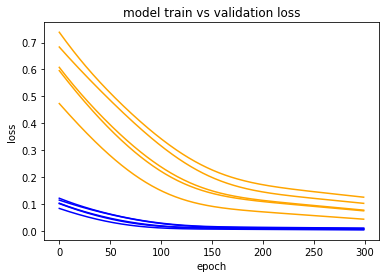

In [14]:
from PIL import Image
im2 = Image.open("multipleruns.png")
im2

Train on 5 samples, validate on 5 samples
Epoch 1/1200
5/5 [==============================] - 1s 296ms/step - loss: 0.1355 - val_loss: 0.8379
Epoch 2/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.1338 - val_loss: 0.8315
Epoch 3/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.1321 - val_loss: 0.8252
Epoch 4/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.1304 - val_loss: 0.8189
Epoch 5/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.1287 - val_loss: 0.8127
Epoch 6/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.1270 - val_loss: 0.8065
Epoch 7/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.1254 - val_loss: 0.8004
Epoch 8/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.1238 - val_loss: 0.7943
Epoch 9/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.1222 - val_loss: 0.7883
Epoch 10/1200
5/5 [==============================] - 0s 2ms/step - loss: 0

Epoch 84/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.0422 - val_loss: 0.4427
Epoch 85/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.0416 - val_loss: 0.4392
Epoch 86/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.0409 - val_loss: 0.4357
Epoch 87/1200
5/5 [==============================] - 0s 4ms/step - loss: 0.0403 - val_loss: 0.4322
Epoch 88/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.4288
Epoch 89/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.4254
Epoch 90/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0386 - val_loss: 0.4220
Epoch 91/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0380 - val_loss: 0.4187
Epoch 92/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0374 - val_loss: 0.4153
Epoch 93/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.0369 - val_loss: 0.4120
Epoch 94/1

5/5 [==============================] - 0s 3ms/step - loss: 0.0168 - val_loss: 0.2371
Epoch 167/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0167 - val_loss: 0.2356
Epoch 168/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0166 - val_loss: 0.2341
Epoch 169/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0166 - val_loss: 0.2327
Epoch 170/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.0165 - val_loss: 0.2313
Epoch 171/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.0164 - val_loss: 0.2299
Epoch 172/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.0163 - val_loss: 0.2286
Epoch 173/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.0163 - val_loss: 0.2272
Epoch 174/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0162 - val_loss: 0.2259
Epoch 175/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0161 - val_loss: 0.2246
Epoch 176/1200


5/5 [==============================] - 0s 2ms/step - loss: 0.0133 - val_loss: 0.1673
Epoch 249/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0133 - val_loss: 0.1668
Epoch 250/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.1663
Epoch 251/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.1658
Epoch 252/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.1653
Epoch 253/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.1648
Epoch 254/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.1643
Epoch 255/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.1638
Epoch 256/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0130 - val_loss: 0.1633
Epoch 257/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0130 - val_loss: 0.1628
Epoch 258/1200


5/5 [==============================] - 0s 2ms/step - loss: 0.0107 - val_loss: 0.1293
Epoch 331/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0107 - val_loss: 0.1289
Epoch 332/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.0106 - val_loss: 0.1284
Epoch 333/1200
5/5 [==============================] - 0s 4ms/step - loss: 0.0106 - val_loss: 0.1280
Epoch 334/1200
5/5 [==============================] - 0s 4ms/step - loss: 0.0106 - val_loss: 0.1275
Epoch 335/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.1271
Epoch 336/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.1266
Epoch 337/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.1262
Epoch 338/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.1257
Epoch 339/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0104 - val_loss: 0.1253
Epoch 340/1200


5/5 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.0930
Epoch 413/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.0925
Epoch 414/1200
5/5 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.0921
Epoch 415/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.0917
Epoch 416/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.0912
Epoch 417/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.0908
Epoch 418/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.0904
Epoch 419/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0899
Epoch 420/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.0895
Epoch 421/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0891
Epoch 422/1200


5/5 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0590
Epoch 495/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0586
Epoch 496/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0582
Epoch 497/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0578
Epoch 498/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0575
Epoch 499/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.0571
Epoch 500/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0053 - val_loss: 0.0567
Epoch 501/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0563
Epoch 502/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0053 - val_loss: 0.0559
Epoch 503/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0555
Epoch 504/1200


Epoch 577/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0032 - val_loss: 0.0302
Epoch 578/1200
5/5 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0299
Epoch 579/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0296
Epoch 580/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0293
Epoch 581/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0290
Epoch 582/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0287
Epoch 583/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0284
Epoch 584/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0281
Epoch 585/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0278
Epoch 586/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0276


Epoch 659/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0109
Epoch 660/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0107
Epoch 661/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0106
Epoch 662/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0104
Epoch 663/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0103
Epoch 664/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0101
Epoch 665/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0099
Epoch 666/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0098
Epoch 667/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0096
Epoch 668/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0095


Epoch 740/1200
5/5 [==============================] - 0s 3ms/step - loss: 5.7247e-04 - val_loss: 0.0020
Epoch 741/1200
5/5 [==============================] - 0s 2ms/step - loss: 5.6473e-04 - val_loss: 0.0020
Epoch 742/1200
5/5 [==============================] - 0s 2ms/step - loss: 5.5708e-04 - val_loss: 0.0019
Epoch 743/1200
5/5 [==============================] - 0s 2ms/step - loss: 5.4951e-04 - val_loss: 0.0019
Epoch 744/1200
5/5 [==============================] - 0s 2ms/step - loss: 5.4203e-04 - val_loss: 0.0018
Epoch 745/1200
5/5 [==============================] - 0s 3ms/step - loss: 5.3463e-04 - val_loss: 0.0017
Epoch 746/1200
5/5 [==============================] - 0s 2ms/step - loss: 5.2731e-04 - val_loss: 0.0017
Epoch 747/1200
5/5 [==============================] - 0s 2ms/step - loss: 5.2008e-04 - val_loss: 0.0016
Epoch 748/1200
5/5 [==============================] - 0s 3ms/step - loss: 5.1293e-04 - val_loss: 0.0016
Epoch 749/1200
5/5 [==============================] - 0s 2ms/ste

Epoch 817/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.8679e-04 - val_loss: 3.2800e-05
Epoch 818/1200
5/5 [==============================] - 0s 3ms/step - loss: 1.8401e-04 - val_loss: 2.9993e-05
Epoch 819/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.8126e-04 - val_loss: 2.7559e-05
Epoch 820/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.7857e-04 - val_loss: 2.5490e-05
Epoch 821/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.7591e-04 - val_loss: 2.3778e-05
Epoch 822/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.7329e-04 - val_loss: 2.2417e-05
Epoch 823/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.7071e-04 - val_loss: 2.1399e-05
Epoch 824/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.6818e-04 - val_loss: 2.0718e-05
Epoch 825/1200
5/5 [==============================] - 0s 3ms/step - loss: 1.6568e-04 - val_loss: 2.0368e-05
Epoch 826/1200
5/5 [========

Epoch 893/1200
5/5 [==============================] - 0s 3ms/step - loss: 6.5091e-05 - val_loss: 4.6318e-04
Epoch 894/1200
5/5 [==============================] - 0s 2ms/step - loss: 6.4338e-05 - val_loss: 4.7297e-04
Epoch 895/1200
5/5 [==============================] - 0s 3ms/step - loss: 6.3600e-05 - val_loss: 4.8278e-04
Epoch 896/1200
5/5 [==============================] - 0s 3ms/step - loss: 6.2875e-05 - val_loss: 4.9261e-04
Epoch 897/1200
5/5 [==============================] - 0s 4ms/step - loss: 6.2164e-05 - val_loss: 5.0245e-04
Epoch 898/1200
5/5 [==============================] - 0s 3ms/step - loss: 6.1467e-05 - val_loss: 5.1230e-04
Epoch 899/1200
5/5 [==============================] - 0s 2ms/step - loss: 6.0782e-05 - val_loss: 5.2215e-04
Epoch 900/1200
5/5 [==============================] - 0s 3ms/step - loss: 6.0111e-05 - val_loss: 5.3202e-04
Epoch 901/1200
5/5 [==============================] - 0s 2ms/step - loss: 5.9453e-05 - val_loss: 5.4188e-04
Epoch 902/1200
5/5 [========

Epoch 970/1200
5/5 [==============================] - 0s 4ms/step - loss: 3.5025e-05 - val_loss: 0.0012
Epoch 971/1200
5/5 [==============================] - 0s 3ms/step - loss: 3.4867e-05 - val_loss: 0.0012
Epoch 972/1200
5/5 [==============================] - 0s 3ms/step - loss: 3.4713e-05 - val_loss: 0.0012
Epoch 973/1200
5/5 [==============================] - 0s 3ms/step - loss: 3.4562e-05 - val_loss: 0.0012
Epoch 974/1200
5/5 [==============================] - 0s 3ms/step - loss: 3.4413e-05 - val_loss: 0.0012
Epoch 975/1200
5/5 [==============================] - 0s 2ms/step - loss: 3.4269e-05 - val_loss: 0.0012
Epoch 976/1200
5/5 [==============================] - 0s 3ms/step - loss: 3.4127e-05 - val_loss: 0.0012
Epoch 977/1200
5/5 [==============================] - 0s 3ms/step - loss: 3.3988e-05 - val_loss: 0.0012
Epoch 978/1200
5/5 [==============================] - 0s 2ms/step - loss: 3.3852e-05 - val_loss: 0.0012
Epoch 979/1200
5/5 [==============================] - 0s 2ms/ste

Epoch 1049/1200
5/5 [==============================] - 0s 1ms/step - loss: 2.8938e-05 - val_loss: 0.0015
Epoch 1050/1200
5/5 [==============================] - 0s 2ms/step - loss: 2.8908e-05 - val_loss: 0.0015
Epoch 1051/1200
5/5 [==============================] - 0s 2ms/step - loss: 2.8878e-05 - val_loss: 0.0015
Epoch 1052/1200
5/5 [==============================] - 0s 2ms/step - loss: 2.8850e-05 - val_loss: 0.0015
Epoch 1053/1200
5/5 [==============================] - 0s 4ms/step - loss: 2.8821e-05 - val_loss: 0.0015
Epoch 1054/1200
5/5 [==============================] - 0s 3ms/step - loss: 2.8794e-05 - val_loss: 0.0016
Epoch 1055/1200
5/5 [==============================] - 0s 3ms/step - loss: 2.8766e-05 - val_loss: 0.0016
Epoch 1056/1200
5/5 [==============================] - 0s 2ms/step - loss: 2.8740e-05 - val_loss: 0.0016
Epoch 1057/1200
5/5 [==============================] - 0s 2ms/step - loss: 2.8713e-05 - val_loss: 0.0016
Epoch 1058/1200
5/5 [==============================] - 

5/5 [==============================] - 0s 2ms/step - loss: 2.7622e-05 - val_loss: 0.0017
Epoch 1128/1200
5/5 [==============================] - 0s 2ms/step - loss: 2.7612e-05 - val_loss: 0.0017
Epoch 1129/1200
5/5 [==============================] - 0s 2ms/step - loss: 2.7602e-05 - val_loss: 0.0017
Epoch 1130/1200
5/5 [==============================] - 0s 2ms/step - loss: 2.7593e-05 - val_loss: 0.0017
Epoch 1131/1200
5/5 [==============================] - 0s 1ms/step - loss: 2.7583e-05 - val_loss: 0.0017
Epoch 1132/1200
5/5 [==============================] - 0s 1ms/step - loss: 2.7574e-05 - val_loss: 0.0017
Epoch 1133/1200
5/5 [==============================] - 0s 1ms/step - loss: 2.7564e-05 - val_loss: 0.0017
Epoch 1134/1200
5/5 [==============================] - 0s 2ms/step - loss: 2.7555e-05 - val_loss: 0.0017
Epoch 1135/1200
5/5 [==============================] - 0s 2ms/step - loss: 2.7546e-05 - val_loss: 0.0017
Epoch 1136/1200
5/5 [==============================] - 0s 2ms/step - lo

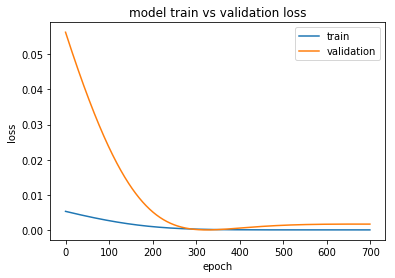

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
from numpy import array

# return training data
def get_train():
	seq = [[0.0, 0.1], [0.1, 0.2], [0.2, 0.3], [0.3, 0.4], [0.4, 0.5]]
	seq = array(seq)
	X, y = seq[:, 0], seq[:, 1]
	X = X.reshape((5, 1, 1))
	return X, y

# return validation data
def get_val():
	seq = [[0.5, 0.6], [0.6, 0.7], [0.7, 0.8], [0.8, 0.9], [0.9, 1.0]]
	seq = array(seq)
	X, y = seq[:, 0], seq[:, 1]
	X = X.reshape((len(X), 1, 1))
	return X, y

# define model
model = Sequential()
model.add(LSTM(10, input_shape=(1,1)))
model.add(Dense(1, activation='linear'))
# compile model
model.compile(loss='mse', optimizer='adam')
# fit model
X,y = get_train()
valX, valY = get_val()
history = model.fit(X, y, epochs=1200, validation_data=(valX, valY), shuffle=False)
# plot train and validation loss
pyplot.plot(history.history['loss'][500:])
pyplot.plot(history.history['val_loss'][500:])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

# Multiple Runs Example

LSTMs are stochastic, meaning that you will get a different diagnostic plot each run.
It can be useful to repeat the diagnostic run multiple times (e.g. 5, 10, or 30). The train and 
validation traces from each run can then be plotted to give a more robust idea of the behavior of 
the model over time. The example below runs the same experiment a number of times before plotting 
the trace of train and validation loss for each run.

Train on 5 samples, validate on 5 samples
Epoch 1/300
5/5 [==============================] - 2s 339ms/step - loss: 0.0834 - val_loss: 0.4733
Epoch 2/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0822 - val_loss: 0.4690
Epoch 3/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0809 - val_loss: 0.4648
Epoch 4/300
5/5 [==============================] - 0s 10ms/step - loss: 0.0797 - val_loss: 0.4605
Epoch 5/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0784 - val_loss: 0.4563
Epoch 6/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0772 - val_loss: 0.4521
Epoch 7/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0760 - val_loss: 0.4479
Epoch 8/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0748 - val_loss: 0.4437
Epoch 9/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0736 - val_loss: 0.4395
Epoch 10/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0724 - v

5/5 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0827
Epoch 168/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0822
Epoch 169/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0818
Epoch 170/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0814
Epoch 171/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.0809
Epoch 172/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.0805
Epoch 173/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.0801
Epoch 174/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0797
Epoch 175/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.0793
Epoch 176/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0789
Epoch 177/300
5/5 [=====

Epoch 250/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0571
Epoch 251/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0568
Epoch 252/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0565
Epoch 253/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0563
Epoch 254/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0560
Epoch 255/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0557
Epoch 256/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0555
Epoch 257/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0552
Epoch 258/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0549
Epoch 259/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0546
Epoch 260/

Epoch 33/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0801 - val_loss: 0.5859
Epoch 34/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0791 - val_loss: 0.5816
Epoch 35/300
5/5 [==============================] - 0s 10ms/step - loss: 0.0780 - val_loss: 0.5774
Epoch 36/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0769 - val_loss: 0.5732
Epoch 37/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0759 - val_loss: 0.5690
Epoch 38/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0748 - val_loss: 0.5648
Epoch 39/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0738 - val_loss: 0.5607
Epoch 40/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0728 - val_loss: 0.5566
Epoch 41/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0718 - val_loss: 0.5525
Epoch 42/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0708 - val_loss: 0.5484
Epoch 43/300
5/5 [=

Epoch 117/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0227 - val_loss: 0.2984
Epoch 118/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0224 - val_loss: 0.2959
Epoch 119/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0221 - val_loss: 0.2934
Epoch 120/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0218 - val_loss: 0.2909
Epoch 121/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0215 - val_loss: 0.2884
Epoch 122/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0212 - val_loss: 0.2860
Epoch 123/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0209 - val_loss: 0.2835
Epoch 124/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0207 - val_loss: 0.2811
Epoch 125/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0204 - val_loss: 0.2788
Epoch 126/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0202 - val_loss: 0.2764
Epoch 127/

Epoch 200/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.1722
Epoch 201/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.1715
Epoch 202/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.1708
Epoch 203/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.1702
Epoch 204/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0130 - val_loss: 0.1695
Epoch 205/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0130 - val_loss: 0.1689
Epoch 206/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0130 - val_loss: 0.1682
Epoch 207/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0129 - val_loss: 0.1676
Epoch 208/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0129 - val_loss: 0.1670
Epoch 209/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0129 - val_loss: 0.1664
Epoch 210/

Epoch 283/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0108 - val_loss: 0.1323
Epoch 284/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0107 - val_loss: 0.1318
Epoch 285/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0107 - val_loss: 0.1314
Epoch 286/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0107 - val_loss: 0.1310
Epoch 287/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0107 - val_loss: 0.1306
Epoch 288/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0106 - val_loss: 0.1302
Epoch 289/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0106 - val_loss: 0.1298
Epoch 290/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0106 - val_loss: 0.1294
Epoch 291/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.1289
Epoch 292/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.1285
Epoch 293/

5/5 [==============================] - 0s 3ms/step - loss: 0.0489 - val_loss: 0.4311
Epoch 67/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0481 - val_loss: 0.4276
Epoch 68/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0474 - val_loss: 0.4241
Epoch 69/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0466 - val_loss: 0.4205
Epoch 70/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0459 - val_loss: 0.4170
Epoch 71/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0452 - val_loss: 0.4135
Epoch 72/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0445 - val_loss: 0.4101
Epoch 73/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0438 - val_loss: 0.4066
Epoch 74/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0431 - val_loss: 0.4031
Epoch 75/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0424 - val_loss: 0.3997
Epoch 76/300
5/5 [===============

Epoch 150/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0143 - val_loss: 0.2004
Epoch 151/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0141 - val_loss: 0.1987
Epoch 152/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0140 - val_loss: 0.1971
Epoch 153/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0139 - val_loss: 0.1955
Epoch 154/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0138 - val_loss: 0.1939
Epoch 155/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0137 - val_loss: 0.1923
Epoch 156/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.1908
Epoch 157/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0135 - val_loss: 0.1893
Epoch 158/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0134 - val_loss: 0.1878
Epoch 159/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0134 - val_loss: 0.1863
Epoch 160/

Epoch 233/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0106 - val_loss: 0.1282
Epoch 234/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0105 - val_loss: 0.1278
Epoch 235/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.1274
Epoch 236/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.1269
Epoch 237/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.1265
Epoch 238/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0104 - val_loss: 0.1261
Epoch 239/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0104 - val_loss: 0.1257
Epoch 240/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0104 - val_loss: 0.1253
Epoch 241/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0104 - val_loss: 0.1249
Epoch 242/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0103 - val_loss: 0.1245
Epoch 243/

Epoch 16/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0829 - val_loss: 0.5371
Epoch 17/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0817 - val_loss: 0.5326
Epoch 18/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0805 - val_loss: 0.5282
Epoch 19/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0793 - val_loss: 0.5237
Epoch 20/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0781 - val_loss: 0.5193
Epoch 21/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0769 - val_loss: 0.5150
Epoch 22/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0757 - val_loss: 0.5106
Epoch 23/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0746 - val_loss: 0.5063
Epoch 24/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0734 - val_loss: 0.5020
Epoch 25/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0723 - val_loss: 0.4977
Epoch 26/300
5/5 [==

Epoch 100/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0189 - val_loss: 0.2402
Epoch 101/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0186 - val_loss: 0.2377
Epoch 102/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.2352
Epoch 103/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0179 - val_loss: 0.2328
Epoch 104/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0176 - val_loss: 0.2304
Epoch 105/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0173 - val_loss: 0.2280
Epoch 106/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0170 - val_loss: 0.2256
Epoch 107/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0168 - val_loss: 0.2233
Epoch 108/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0165 - val_loss: 0.2210
Epoch 109/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0162 - val_loss: 0.2187
Epoch 110/

Epoch 183/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 0.1226
Epoch 184/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 0.1220
Epoch 185/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0093 - val_loss: 0.1214
Epoch 186/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0092 - val_loss: 0.1208
Epoch 187/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.1203
Epoch 188/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.1197
Epoch 189/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0092 - val_loss: 0.1192
Epoch 190/300
5/5 [==============================] - 0s 5ms/step - loss: 0.0091 - val_loss: 0.1187
Epoch 191/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.1181
Epoch 192/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.1176
Epoch 193/

Epoch 266/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.0891
Epoch 267/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.0887
Epoch 268/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.0884
Epoch 269/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0072 - val_loss: 0.0880
Epoch 270/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.0877
Epoch 271/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.0873
Epoch 272/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.0870
Epoch 273/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0071 - val_loss: 0.0866
Epoch 274/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.0863
Epoch 275/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0070 - val_loss: 0.0859
Epoch 276/

Epoch 49/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0463 - val_loss: 0.3850
Epoch 50/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0454 - val_loss: 0.3811
Epoch 51/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0445 - val_loss: 0.3773
Epoch 52/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0437 - val_loss: 0.3735
Epoch 53/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0429 - val_loss: 0.3698
Epoch 54/300
5/5 [==============================] - 0s 7ms/step - loss: 0.0421 - val_loss: 0.3660
Epoch 55/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0413 - val_loss: 0.3623
Epoch 56/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0405 - val_loss: 0.3586
Epoch 57/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0397 - val_loss: 0.3550
Epoch 58/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0389 - val_loss: 0.3513
Epoch 59/300
5/5 [==

Epoch 133/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0112 - val_loss: 0.1611
Epoch 134/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0111 - val_loss: 0.1597
Epoch 135/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0110 - val_loss: 0.1583
Epoch 136/300
5/5 [==============================] - 0s 5ms/step - loss: 0.0109 - val_loss: 0.1570
Epoch 137/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0108 - val_loss: 0.1557
Epoch 138/300
5/5 [==============================] - 0s 6ms/step - loss: 0.0107 - val_loss: 0.1544
Epoch 139/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0107 - val_loss: 0.1531
Epoch 140/300
5/5 [==============================] - 0s 5ms/step - loss: 0.0106 - val_loss: 0.1519
Epoch 141/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0105 - val_loss: 0.1507
Epoch 142/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.1495
Epoch 143/

Epoch 216/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.1033
Epoch 217/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.1029
Epoch 218/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.1026
Epoch 219/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.1022
Epoch 220/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.1018
Epoch 221/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.1015
Epoch 222/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.1011
Epoch 223/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.1008
Epoch 224/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.1004
Epoch 225/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.1001
Epoch 226/

Epoch 299/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0749
Epoch 300/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.0746


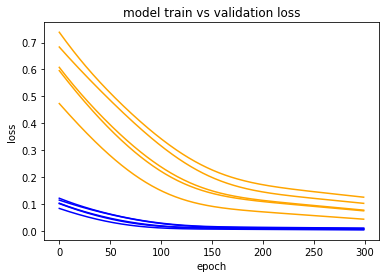

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
from numpy import array
from pandas import DataFrame

# return training data
def get_train():
	seq = [[0.0, 0.1], [0.1, 0.2], [0.2, 0.3], [0.3, 0.4], [0.4, 0.5]]
	seq = array(seq)
	X, y = seq[:, 0], seq[:, 1]
	X = X.reshape((5, 1, 1))
	return X, y

# return validation data
def get_val():
	seq = [[0.5, 0.6], [0.6, 0.7], [0.7, 0.8], [0.8, 0.9], [0.9, 1.0]]
	seq = array(seq)
	X, y = seq[:, 0], seq[:, 1]
	X = X.reshape((len(X), 1, 1))
	return X, y

# collect data across multiple repeats
train = DataFrame()
val = DataFrame()
for i in range(5):
	# define model
	model = Sequential()
	model.add(LSTM(10, input_shape=(1,1)))
	model.add(Dense(1, activation='linear'))
	# compile model
	model.compile(loss='mse', optimizer='adam')
	X,y = get_train()
	valX, valY = get_val()
	# fit model
	history = model.fit(X, y, epochs=300, validation_data=(valX, valY), shuffle=False)
	# story history
	train[str(i)] = history.history['loss']
	val[str(i)] = history.history['val_loss']

# plot train and validation loss across multiple runs
pyplot.plot(train, color='blue', label='train')
pyplot.plot(val, color='orange', label='validation')
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.show()

In [ ]:
>>> import nltk
>>> def tokenize(sentences):
...     for sent in nltk.sent_tokenize(sentences.lower()):
...         for word in nltk.word_tokenize(sent):
...             yield word
... 

>>> nltk.Text(tkn for tkn in tokenize('mary had a little lamb.'))
<Text: mary had a little lamb ....>
>>> text = nltk.Text(tkn for tkn in tokenize('mary had a little lamb.'))
There are none in this small segment, but here goes:

>>> text.collocations(num=20)
Building collocations list

In [2]:
#import gym
import universe

ImportError: No module named 'universe'